In [1]:
#@title Importing Packages
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from copy import copy
from statistics import mode

In [2]:
#@title Functions
def k_means(X, k, ITR = None, PLT = None):
  L, n = X.shape
  rnd = random.sample(range(L), k)
  C_new = X[rnd]
  cost = []; Ratio = []
  itr = 0
  while True:
    C = copy(C_new)
    dist_to_C = Distance_to_Centers(X, C, k, L)
    labels = np.argmin(dist_to_C, axis = 0)
    Inner_dist = sum(dist_to_C[labels,range(L)])
    Outer_dist = np.sum(dist_to_C) - Inner_dist
    cost.append(Inner_dist)
    Ratio.append(Outer_dist / (Inner_dist + Outer_dist))
    for i in range(k):
      C_new[i] = np.mean(X[labels == i], axis = 0)
    itr += 1
    if (((C_new == C).all() and ITR == None) or (itr == ITR)): 
      break
  if PLT == 'show':
    plt.plot(range(itr), cost)
    plt.xlabel('itration')
    plt.ylabel('cost value')
    plt.title('Value of Cost Function per Itration for {}-means'.format(k))
  return C, cost, Ratio, itr, labels

def Intelligent_k_means(X, k, cons_num, Constraints, ITR = None):
  L, n = X.shape
  Cons = random.sample(Constraints, cons_num)
  rnd = random.sample(range(L), k)
  C_new = X[rnd]
  cost = []; Ratio = []
  itr = 0
  while True:
    C = copy(C_new)
    dist_to_C = Distance_to_Centers(X, C, k, L)
    labels = np.argmin(dist_to_C, axis = 0)
    for i in range(k):
      C_new[i] = np.mean(X[labels == i], axis = 0)
    # Checking the Constraints
    labels = Contraints_Check(labels, dist_to_C, Cons, k, L)
    dist_to_C = Distance_to_Centers(X, C, k, L)
    Inner_dist = sum(dist_to_C[labels,range(L)])
    Outer_dist = np.sum(dist_to_C) - Inner_dist
    cost.append(Inner_dist)
    Ratio.append(Outer_dist / (Inner_dist + Outer_dist))
    itr += 1
    if (((C_new == C).all() and ITR == None) or (itr == ITR)): 
      break
  return C, cost, Ratio, itr, labels

def Contraints_Check(labels, dist_to_C, Contraints, k, L):
  for cons in Contraints:
    ind1 = cons[0]; ind2 = cons[1]; c = cons[2]
    cluster1 = labels[ind1]; cluster2 = labels[ind2]
    if c == 1:
      if cluster1 != cluster2:
        cost1 = dist_to_C[cluster1,ind1] + dist_to_C[cluster1,ind2]
        cost2 = dist_to_C[cluster2,ind1] + dist_to_C[cluster2,ind2]
        if cost1 < cost2: labels[ind2] = cluster1
        else: labels[ind1] = cluster2
    else:
      if cluster1 == cluster2:
        new_dist_to_C = np.zeros([k-1,L])
        for i in range(L):
          new_dist_to_C[:,i] = dist_to_C[range(k) != labels[i],i]
        second_labels = np.argmin(new_dist_to_C, axis = 0)
        second_cluster1 = second_labels[ind1]; second_cluster2 = second_labels[ind2]
        cost1 = dist_to_C[cluster1,ind1] + dist_to_C[second_cluster2,ind2]
        cost2 = dist_to_C[second_cluster1,ind1] + dist_to_C[cluster2,ind2]
        if cost1 < cost2:
          labels[ind2] = second_cluster2
          dist_to_C[cluster2,ind2] = np.inf
        else: 
          labels[ind1] = second_cluster1
          dist_to_C[cluster1,ind1] = np.inf
  return labels

def D(i, j):
  return np.sqrt(sum(np.subtract(i,j)**2))

def Distance_to_Centers(X, C, k, L):
  dist_to_C = np.zeros([k, L])
  for i in range(L):
    for j in range(k):
      dist_to_C[j,i] = D(X[i], C[j])
  return dist_to_C

def Accuracy(labels):
  acc = (sum(labels[0:50] == mode(labels[0:50])) + sum(labels[50:100] == mode(labels[50:100])) + sum(labels[100:] == mode(labels[100:]))) / 150 * 100
  return acc

In [3]:
#@title Adding Dataset
data = load_iris()
Target = data.target
X = data.data

> Part 1: Simple k-Means Clustering 

>> Part a: Cost function - itrations diagram (ITR = 20)

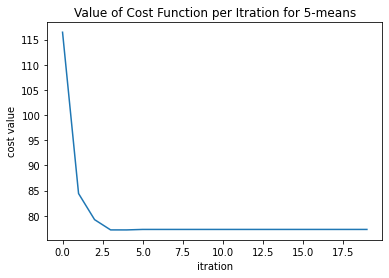

In [4]:
#@title Cost-itrations diagram for 5-Means
C_5, cost_5, Ratio_5, itr_5, labels_5 = k_means(X, 5, 20, 'show')

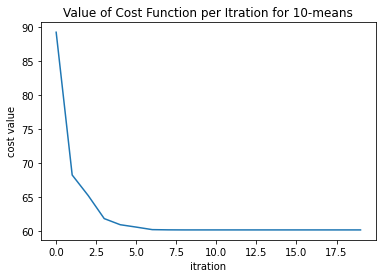

In [5]:
#@title Cost-itrations diagram for 10-Means
C_10, cost_10, Ratio_10, itr_10, labels_10 = k_means(X, 10, 20, 'show')

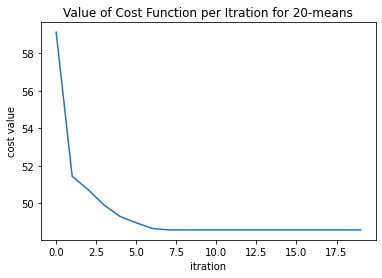

In [9]:
#@title Cost-itrations diagram for 20-Means
C_20, cost_20, Ratio_20, itr_20, labels_20 = k_means(X, 20, 20, 'show')

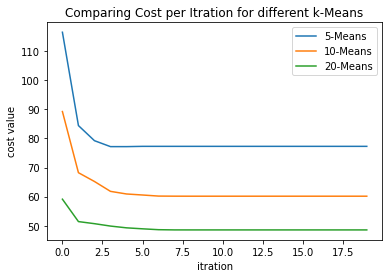

In [10]:
#@title Comparing Cost - Itrations diagram
plt.plot(range(20), cost_5, label = '5-Means')
plt.plot(range(20), cost_10, label = '10-Means')
plt.plot(range(20), cost_20, label = '20-Means')
plt.xlabel('itration')
plt.ylabel('cost value')
plt.title('Comparing Cost per Itration for different k-Means')
plt.legend()
plt.show()

>> Part b: Ratio - Itration diagram

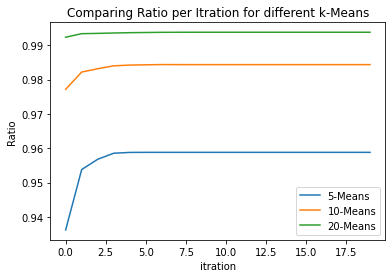

In [11]:
#@title Comparing Ratio - Itrations diagrams
plt.plot(range(20), Ratio_5, label = '5-Means')
plt.plot(range(20), Ratio_10, label = '10-Means')
plt.plot(range(20), Ratio_20, label = '20-Means')
plt.xlabel('itration')
plt.ylabel('Ratio')
plt.title('Comparing Ratio per Itration for different k-Means')
plt.legend()
plt.show()

In [12]:
#@title Average and Variance of Ratio and Cost-function
n = 20
Ratio_list_3 = []; Ratio_list_5 = []; Ratio_list_10 = []; Ratio_list_20 = []
Cost_list_3 = []; Cost_list_5 = []; Cost_list_10 = []; Cost_list_20 = []
for i in range(n):
  C_3, cost_3, Ratio_3, itr_3, labels_3 = k_means(X, k = 3, ITR = 20)
  Cost_list_3.append(cost_3[-1])
  Ratio_list_3.append(Ratio_3[-1])
  C_5, cost_5, Ratio_5, itr_5, labels_5 = k_means(X, k = 5, ITR = 20)
  Cost_list_5.append(cost_5[-1])
  Ratio_list_5.append(Ratio_5[-1])
  C_10, cost_10, Ratio_10, itr_10, labels_10 = k_means(X, k = 10, ITR = 20)
  Cost_list_10.append(cost_10[-1])
  Ratio_list_10.append(Ratio_10[-1])
  C_20, cost_20, Ratio_20, itr_20, labels_20 = k_means(X, k = 20, ITR = 20)
  Cost_list_20.append(cost_20[-1])
  Ratio_list_20.append(Ratio_20[-1])
Ratio_3_Avg = np.mean(Ratio_list_3); Cost_3_Avg = np.mean(Cost_list_3)
Ratio_3_Var = np.var(Ratio_list_3); Cost_3_Var = np.var(Cost_list_3)
Ratio_5_Avg = np.mean(Ratio_list_5); Cost_5_Avg = np.mean(Cost_list_5)
Ratio_5_Var = np.var(Ratio_list_5); Cost_5_Var = np.var(Cost_list_5)
Ratio_10_Avg = np.mean(Ratio_list_10); Cost_10_Avg = np.mean(Cost_list_10)
Ratio_10_Var = np.var(Ratio_list_10); Cost_10_Var = np.var(Cost_list_10)
Ratio_20_Avg = np.mean(Ratio_list_20); Cost_20_Avg = np.mean(Cost_list_20)
Ratio_20_Var = np.var(Ratio_list_20); Cost_20_Var = np.var(Cost_list_20)
print('Average and Variance of Ratio and Cost-function:\n')
print(' for k = 3: Average-Ratio = {}, Variance-Ratio = {}, Average-Cost = {}, Variance-Cost = {}'.format(Ratio_3_Avg, Ratio_3_Var, Cost_3_Avg, Cost_3_Var))
print(' for k = 5: Average-Ratio = {}, Variance-Ratio = {}, Average-Cost = {}, Variance-Cost = {}'.format(Ratio_5_Avg, Ratio_5_Var, Cost_5_Avg, Cost_5_Var))
print(' for k = 10: Average-Ratio = {}, Variance-Ratio = {}, Average-Cost = {}, Variance-Cost = {}'.format(Ratio_10_Avg, Ratio_10_Var, Cost_10_Avg, Cost_10_Var))
print(' for k = 20: Average-Ratio = {}, Variance-Ratio = {}, Average-Cost = {}, Variance-Cost = {}'.format(Ratio_20_Avg, Ratio_20_Var, Cost_20_Avg, Cost_20_Var))

Average and Variance of Ratio and Cost-function:

 for k = 3: Average-Ratio = 0.9084789310929973, Variance-Ratio = 5.671693476168509e-05, Average-Cost = 102.43300960994789, Variance-Cost = 109.07631557113606
 for k = 5: Average-Ratio = 0.9576949345028251, Variance-Ratio = 3.174166544977957e-06, Average-Cost = 78.71303130133334, Variance-Cost = 11.977328307782589
 for k = 10: Average-Ratio = 0.983843216619799, Variance-Ratio = 1.0374128410723473e-06, Average-Cost = 61.82431957661487, Variance-Cost = 8.655162365805863
 for k = 20: Average-Ratio = 0.9939752792758553, Variance-Ratio = 4.8088957622912295e-08, Average-Cost = 46.3281753129137, Variance-Cost = 0.8111262850881756


Text(0, 0.5, 'Cost-function')

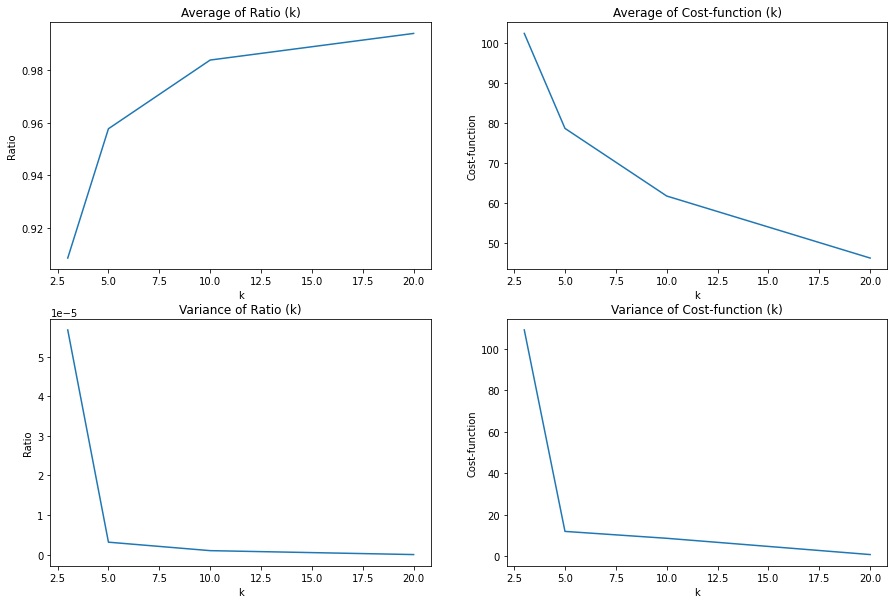

In [13]:
#@title Average and Variance of Ratio and Cost-function Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0,0].plot([3,5,10,20], [Ratio_3_Avg, Ratio_5_Avg, Ratio_10_Avg, Ratio_20_Avg])
axs[0,0].set_title('Average of Ratio (k)')
axs[0,0].set_xlabel('k')
axs[0,0].set_ylabel('Ratio')
axs[0,1].plot([3,5,10,20], [Cost_3_Avg, Cost_5_Avg, Cost_10_Avg, Cost_20_Avg])
axs[0,1].set_title('Average of Cost-function (k)')
axs[0,1].set_xlabel('k')
axs[0,1].set_ylabel('Cost-function')
axs[1,0].plot([3,5,10,20], [Ratio_3_Var, Ratio_5_Var, Ratio_10_Var, Ratio_20_Var])
axs[1,0].set_title('Variance of Ratio (k)')
axs[1,0].set_xlabel('k')
axs[1,0].set_ylabel('Ratio')
axs[1,1].plot([3,5,10,20], [Cost_3_Var, Cost_5_Var, Cost_10_Var, Cost_20_Var])
axs[1,1].set_title('Variance of Cost-function (k)')
axs[1,1].set_xlabel('k')
axs[1,1].set_ylabel('Cost-function')


>Part 2: Intelligent k-Means Clustering

In [14]:
#@title Reading the "Constraint.txt" file
with open('Constraint.txt') as f:
  lines = f.readlines()
del(lines[0])
Constraints = []
for line in lines:
  temp = line.split()
  Constraints.append([int(temp[0]),int(temp[1]),int(temp[2])])

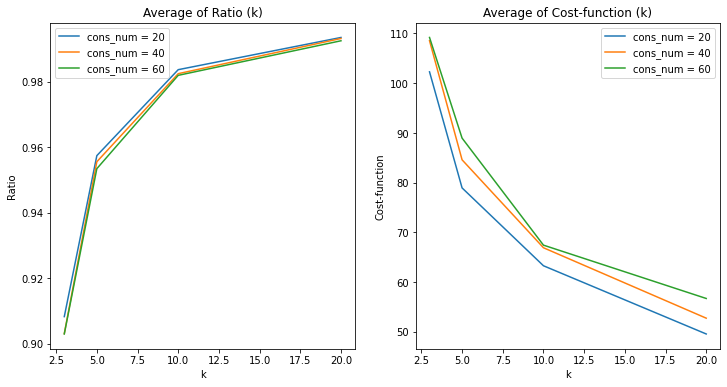

In [23]:
#@title Implementation of Intelligent k-Means Clustering
N = 10
Ratio_list = np.zeros([3,4])
Cost_list = np.zeros([3,4])
for _ in range(N):
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 3, 20, Constraints)
  Cost_list[0,0] += cost[-1] / N; Ratio_list[0,0] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 3, 40, Constraints)
  Cost_list[1,0] += cost[-1] / N; Ratio_list[1,0] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 3, 60, Constraints)
  Cost_list[2,0] += cost[-1] / N; Ratio_list[2,0] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 5, 20, Constraints)
  Cost_list[0,1] += cost[-1] / N; Ratio_list[0,1] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 5, 40, Constraints)
  Cost_list[1,1] += cost[-1] / N; Ratio_list[1,1] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 5, 60, Constraints)
  Cost_list[2,1] += cost[-1] / N; Ratio_list[2,1] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 10, 20, Constraints)
  Cost_list[0,2] += cost[-1] / N; Ratio_list[0,2] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 10, 40, Constraints)
  Cost_list[1,2] += cost[-1] / N; Ratio_list[1,2] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 10, 60, Constraints)
  Cost_list[2,2] += cost[-1] / N; Ratio_list[2,2] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 20, 20, Constraints)
  Cost_list[0,3] += cost[-1] / N; Ratio_list[0,3] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 20, 40, Constraints)
  Cost_list[1,3] += cost[-1] / N; Ratio_list[1,3] += Ratio[-1] / N
  _, cost, Ratio, _, _ = Intelligent_k_means(X, 20, 60, Constraints)
  Cost_list[2,3] += cost[-1] / N; Ratio_list[2,3] += Ratio[-1] / N
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
k = np.array([3, 5, 10, 20])
axs[0].plot(k, Ratio_list[0,:], label = 'cons_num = 20')
axs[0].plot(k, Ratio_list[1,:], label = 'cons_num = 40')
axs[0].plot(k, Ratio_list[2,:], label = 'cons_num = 60')
axs[0].set_title('Average of Ratio (k)')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Ratio')
axs[0].legend()
axs[1].plot(k, Cost_list[0,:], label = 'cons_num = 20')
axs[1].plot(k, Cost_list[1,:], label = 'cons_num = 40')
axs[1].plot(k, Cost_list[2,:], label = 'cons_num = 60')
axs[1].set_title('Average of Cost-function (k)')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Cost-function')
axs[1].legend()

In [27]:
#@title Comparing Accuracy of Simple and Intellignet Clustering 
_, _, _, _, labels_3_cons20 = Intelligent_k_means(X, 3, 20, Constraints)
_, _, _, _, labels_3_cons40 = Intelligent_k_means(X, 3, 40, Constraints)
_, _, _, _, labels_3_cons60 = Intelligent_k_means(X, 3, 60, Constraints)
_, _, _, _, labels_3 = k_means(X, 3)
print('Accuracy of 3-Means Simple and Intelligent Clustering:\n Simple Clustering: {}%'.format(Accuracy(labels_3)))
print(' Intelligent Clustering (20 Constraints): {}%'.format(Accuracy(labels_3_cons20)))
print(' Intelligent Clustering (40 Constraints): {}%'.format(Accuracy(labels_3_cons40)))
print(' Intelligent Clustering (60 Constraints): {}%'.format(Accuracy(labels_3_cons60)))

Accuracy of 3-Means Simple and Intelligent Clustering:
 Simple Clustering: 88.66666666666667%
 Intelligent Clustering (20 Constraints): 90.0%
 Intelligent Clustering (40 Constraints): 90.66666666666666%
 Intelligent Clustering (60 Constraints): 92.66666666666666%
